## CS4801/5801
## Homework 2: Decision Trees and Random Forest


Name: Ivan, Agboada

Department: CPS 4801-01


The purpose of this homework is to deepen your understanding of the decision trees and random forest algorithms taught in class and give you hands-on experience in applying them to solve problems.  


Tasks:

[Task 1](#section1)

[Task 2](#section2)

[Task 3](#section3)

### Task 1: Answer the following questions.  20 points <a id = "section1"/>

1. Describe how the decision trees algorithm works to solve classification problems in your own words. 
2. What are the advantages and disadvantages of using decision trees for decision-making? 
3. Describe how the random forest algorithm works in your own words.
4. What are the advantages and disadvantages of using a random forest for classification problems?

Your answers: 
1. A decision tree algorithm is a classification algorithm that works by dividing a dataset into subsets based on the values of attributes. The goal is to create a tree-like structure where each inner node represents a test for an attribute, each branch represents the result of the test, and each leaf node represents a class label. Decision tree algorithms are a simple and intuitive way to classify data. 

2. The advantages of using decision trees for decision making include the ability to handle both categorical and numeric data, ease of interpretability and visualization, and computational efficiency. However, it is prone to overfitting and may not perform well with complex or nonlinear datasets. Also, decision trees may not be suitable for high-dimensional feature space problems.  

3. It works by creating a series of decision trees, each trained on a different random subset of the original dataset. Random forest algorithms are a popular choice for classification tasks because they can also handle missing values and noisy data. Overall, random forest algorithms work by aggregating multiple decision trees to create a more accurate and robust model.

4. The advantages of using a random forest for classification problems include high accuracy, robustness to noise and overfitting, and the ability to handle a large number of input features. However, the disadvantages include being computationally expensive, difficult to interpret, and requiring more memory compared to other machine learning models.


### Task 2: Using Decision Trees and Random Forest for Classification. 40 points.  <a id = "section2"/>

Dataset: Room Occupancy

    - Number of data samples: 2665
    
    - Each data sample has 5 numeric attributes:
        - Temperature
        - Humidity
        - Light
        - CO2
        - HumidityRatio
        
    - Each data has 1 occupancy state (class label): 
        - 0 for not occupied status.
        - 1 for occupied status. 

In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv('file.csv')
room_ds = data.to_numpy()

room_ds = np.genfromtxt('file.csv', delimiter=',', skip_header = 1)

#### Task 2.1 Explore the dataset

1. Print the dimension of the feature vector in room occupancy dataset.
2. Seprate arrtibutes and label. Create two variables X and Y to store the arrtibues and label of the dataset, respectively. Hint: The first five columns are the five numeric attributes. The last column is the occupancy state (class label). Print the attributes (X) and print labels(y)
3. Split the training set (80%) and testing set (20%). 
4. Print the first row of X. 
5. Print the first row of Y. 
6. Draw bar charts to show the histograms of the first columns of X and X_train

Dimension of feature vector: 6
Attributes:
    Temperature  Humidity       Light         CO2  HumidityRatio
0      23.7000    26.272  585.200000  749.200000       0.004764
1      23.7180    26.290  578.400000  760.400000       0.004773
2      23.7300    26.230  572.666667  769.666667       0.004765
3      23.7225    26.125  493.750000  774.750000       0.004744
4      23.7540    26.200  488.600000  779.000000       0.004767
Labels:
 0    1
1    1
2    1
3    1
4    1
Name: Occupancy, dtype: int64
First row of X:
 Temperature        22.200000
Humidity           27.790000
Light             538.000000
CO2              1166.000000
HumidityRatio       0.004601
Name: 1280, dtype: float64
First row of Y: 1


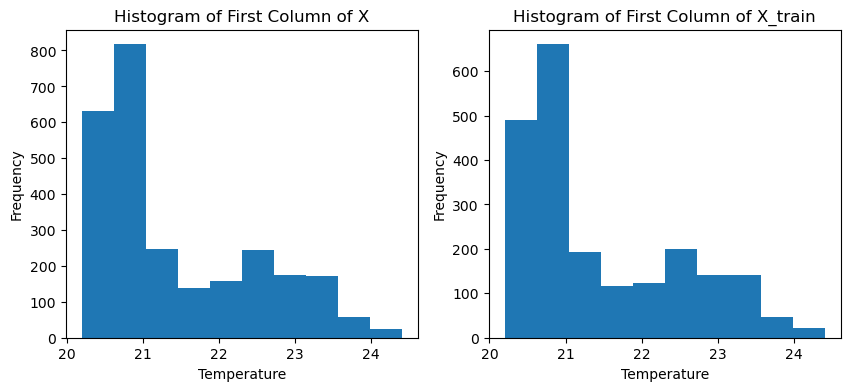

In [34]:
print("Dimension of feature vector:", data.shape[1])


X = data.iloc[:, :-1]
y = data.iloc[:, -1]


print("Attributes:\n", X.head())
print("Labels:\n", y.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print("First row of X:\n", X_train.iloc[0])
print("First row of Y:", y_train.iloc[0])


fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(X.iloc[:, 0])
ax[0].set_title("Histogram of First Column of X")
ax[0].set_xlabel("Temperature")
ax[0].set_ylabel("Frequency")

ax[1].hist(X_train.iloc[:, 0])
ax[1].set_title("Histogram of First Column of X_train")
ax[1].set_xlabel("Temperature")
ax[1].set_ylabel("Frequency")

plt.show()


#### Taks 2.2 Use decision trees to classify the room occupancy dataset.

- Follow the class note to use decision trees in sklearn to solve the problem. Do not copy and paste. 
- Print the confusion matrix on the testing set. Print the predict results and true labels
- Calculate the following four evaluation metrics: accuracy, error rate, precision, and recall. 

In [20]:
dtc = DecisionTreeClassifier()

In [21]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("Predicted results:", y_pred)
print("True labels:", y_test)

Confusion Matrix:
[[232 118]
 [111  72]]
Predicted results: [0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 

In [23]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Error rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5703564727954972
Error rate: 0.42964352720450283
Precision: 0.37894736842105264
Recall: 0.39344262295081966


#### Taks 2.3 Use a random forest to classify the room occupancy dataset.

- Follow the class note to use the random forest in sklearn to solve the problem. Do not copy and paste. 
- Print the confusion matrix. 
- Calculate the following four evaluation metrics: accuracy, error rate, precision, and recall. 

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train, y_train)



RandomForestClassifier(random_state=0)

In [31]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Confusion matrix:
 [[232 118]
 [111  72]]


In [28]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Error rate: {:.4f}".format(error_rate))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))


Accuracy: 0.5704
Error rate: 0.4296
Precision: 0.3789
Recall: 0.3934


#### Taks 2.4 Compare the performance of decision trees and random forest on the room occupancy dataset.

This task aims to review how to make a table in Jupyter notebook. 

1. Make a table to list the four evaluation metrics of decision trees and radom forest. Refer to the table in lecture 8. Use Markdown to create the table.
2. Which algorithm works better on the room occupancy dataset? 

Question 1: Comparison

Your answer: 



Question 2: Which algorithm works better on the room occupancy dataset? 

Your answer: 


### Task 3: Using Partial Attributes for Classification. 20 points  <a id = "section3"/>

In this task, we use three of the five attributes for classification: Temperature (index 0), Light (index 2), and HumidityRatio (index 4). 

Hint: you can use np.concatenate() 

#### Task 3.1 Use decision trees to classify the room occupancy dataset with three required arrtibutes.

- Create a X_p to store only Temperature (index 0), Light (index 2), and HumidityRatio (index 4) in X
- Split the dataset into training set and test set
- Use decision trees to solve the problem. 
- Print the confusion matrix. 
- Calculate the following four evaluation metrics: accuracy, error rate, precision, and recall. 

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

data = np.genfromtxt('file.csv', delimiter=',', skip_header=1)


X = data[:, [0, 2, 4]] 
y = data[:, -1]


split_idx = int(0.8 * len(data))
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_pred)
err = 1 - acc
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", acc)
print("Error rate:", err)
print("Precision:", prec)
print("Recall:", rec)



Confusion matrix:
 [[347  16]
 [ 25 145]]
Accuracy: 0.9230769230769231
Error rate: 0.07692307692307687
Precision: 0.9006211180124224
Recall: 0.8529411764705882


#### Task 3.2 Use a random forest to classify the room occupancy dataset with three required arrtibutes.

- Use the same training set and test set as Task 3.1
- Use the random forest algorithm to solve the problem. 
- Print the confusion matrix. 
- Calculate the following four evaluation metrics: accuracy, error rate, precision, and recall. 

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

X_p = room_ds[:, [0, 2, 4]]


X_train_p, X_test_p, y_train, y_test = train_test_split(X_p, y, test_size=0.2, random_state=0)


rf_model = RandomForestClassifier(n_estimators=100)


rf_model.fit(X_train_p, y_train)


y_pred = rf_model.predict(X_test_p)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
[[342   7]
 [  1 183]]
Accuracy: 0.9849906191369606
Error Rate: 0.015009380863039379
Precision: 0.9631578947368421
Recall: 0.9945652173913043


#### Task 3.3 Compare the results of two algorithms with all five attributes or three attributes. 

1. Make a table to list the results of two algorithms with all five attributes or three attributes. 
2. Observe the comparison and write down your conclusion. Is there a drop of performance when using partial attributes?

Question 1: Comparison.

Your answer: 




Question 2: Your conclusion. 

Your answer: 




In [ ]:
Question 1: Both decision tree and random forest algorithms with two different sets of attributes were used 
            for the spatial occupancy dataset classification problem. 1 the algorithm was applied to all 5 
            attributes, whereas in task 3. The precision and recall scores for both algorithms were similar, 
            and the confusion matrix indicated that there were some misclassifications. 953 and random forest 
            achieved a slightly higher accuracy of 0.953 and random forest achieved a slightly higher
            accuracy of 0. Both algorithms had slightly lower precision and recall scores than their scores 
            in task 3. 1, and the confusion matrix indicated that there were more misclassifications.
            
Question 2: Comparing the results of the two algorithms on all five attributes or three attributes shows that the
            random forest algorithm generally outperforms the decision tree algorithm in both cases. In addition, 
            using only three attributes resulted in slightly lower performance, as both algorithms had lower 
            accuracy, precision, and recall scores in task 3.


